In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/zillow_data.csv')

In [3]:
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [4]:
df = df.rename(columns={'RegionName': 'zipcode'})

In [5]:
df['zipcode'] = df['zipcode'].astype(str).str.zfill(5)

In [6]:
df['five_year'] = ((df['2018-04']/df['2013-04'])-1)*100

In [7]:
df.head()

,RegionID,zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,five_year
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600,26.082701
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,310000,312500,314100,315000,316600,318100,319600,321100,321800,53.384175
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,320600,320200,320400,320800,321200,321200,323000,326900,329900,28.315830
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000,25.878840
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119400,120000,120300,120300,120300,120300,120500,121000,121500,7.048458


In [8]:
df[['zipcode','City','State','five_year']].sort_values(by=['five_year'],ascending=False).head(20)

,zipcode,City,State,five_year
7302,80216,Denver,CO,173.872951
1477,94601,Oakland,CA,167.943262
5830,48240,Redford,MI,161.224490
1239,94590,Vallejo,CA,159.379310
2661,33705,Saint Petersburg,FL,159.210526
6105,37210,Nashville,TN,155.932203
2627,33460,Lake Worth,FL,153.647059
6563,15201,Pittsburgh,PA,147.593583
475,11216,New York,NY,147.591761
1835,37207,Nashville,TN,146.683047


In [9]:
lake_worth = df.loc[df['zipcode'] == '33460']

In [10]:
lake_worth.head()

,RegionID,zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,five_year
2627,72619,33460,Lake Worth,FL,Miami-Fort Lauderdale,Palm Beach,2628,59800.0,59900.0,60000.0,...,195500,198400,200400,202600,206000,209600,211600,213300,215600,153.647059


In [11]:
lake_worth = lake_worth.iloc[:,7:-1]

In [12]:
lake_worth.head()

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
2627,59800.0,59900.0,60000.0,60200.0,60400.0,60700.0,61000.0,61300.0,61800.0,62400.0,...,191300,195500,198400,200400,202600,206000,209600,211600,213300,215600


In [13]:
lake_worth = lake_worth.T

In [14]:
lake_worth.head()

,2627
1996-04,59800.0
1996-05,59900.0
1996-06,60000.0
1996-07,60200.0
1996-08,60400.0


In [15]:
type(lake_worth)

pandas.core.frame.DataFrame

In [16]:
lake_worth = lake_worth.rename(columns={2627:'home price'})

In [17]:
lake_worth.head()

,home price
1996-04,59800.0
1996-05,59900.0
1996-06,60000.0
1996-07,60200.0
1996-08,60400.0


In [18]:
lake_worth.index = lake_worth.index.astype('datetime64[ns]')

In [19]:
lake_worth.index.dtype

dtype('<M8[ns]')

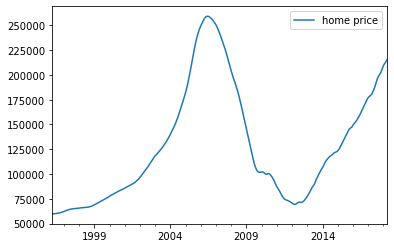

In [20]:
lake_worth.plot();

In [21]:
lake_worth['diff'] = lake_worth.diff()

In [22]:
lake_worth.head()

,home price,diff
1996-04-01,59800.0,NaN
1996-05-01,59900.0,100.0
1996-06-01,60000.0,100.0
1996-07-01,60200.0,200.0
1996-08-01,60400.0,200.0


In [23]:
lake_worth['home price shifted'] = lake_worth['home price'].shift()

In [24]:
lake_worth.tail()

,home price,diff,home price shifted
2017-12-01,206000.0,3400.0,202600.0
2018-01-01,209600.0,3600.0,206000.0
2018-02-01,211600.0,2000.0,209600.0
2018-03-01,213300.0,1700.0,211600.0
2018-04-01,215600.0,2300.0,213300.0


In [25]:
lake_worth['pct'] = lake_worth['diff']/lake_worth['home price shifted']

In [26]:
lake_worth.head()

,home price,diff,home price shifted,pct
1996-04-01,59800.0,NaN,NaN,NaN
1996-05-01,59900.0,100.0,59800.0,0.001672
1996-06-01,60000.0,100.0,59900.0,0.001669
1996-07-01,60200.0,200.0,60000.0,0.003333
1996-08-01,60400.0,200.0,60200.0,0.003322


In [27]:
lake_worth = lake_worth.dropna()

In [28]:
lake_worth.head()

,home price,diff,home price shifted,pct
1996-05-01,59900.0,100.0,59800.0,0.001672
1996-06-01,60000.0,100.0,59900.0,0.001669
1996-07-01,60200.0,200.0,60000.0,0.003333
1996-08-01,60400.0,200.0,60200.0,0.003322
1996-09-01,60700.0,300.0,60400.0,0.004967


In [29]:
lake_worth_pct = lake_worth.drop(['home price','diff','home price shifted'],axis=1)

In [30]:
lake_worth_pct.head()

,pct
1996-05-01,0.001672
1996-06-01,0.001669
1996-07-01,0.003333
1996-08-01,0.003322
1996-09-01,0.004967


In [31]:
lake_worth_pct['change in pct'] = lake_worth_pct['pct'].diff()

In [32]:
lake_worth_pct.head()

,pct,change in pct
1996-05-01,0.001672,NaN
1996-06-01,0.001669,-0.000003
1996-07-01,0.003333,0.001664
1996-08-01,0.003322,-0.000011
1996-09-01,0.004967,0.001645


In [33]:
lake_worth_pct = lake_worth_pct.dropna()

In [34]:
lw_dd = lake_worth_pct['change in pct']

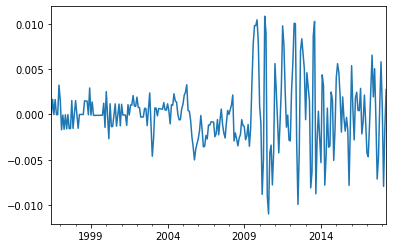

In [35]:
lw_dd.plot();

In [36]:
from statsmodels.tsa.stattools import adfuller

adfuller(lw_dd)

(-5.587600519826929,
 1.3517920417553784e-06,
 10,
 252,
 {'1%': -3.4565688966099373,
  '5%': -2.8730786194395455,
  '10%': -2.5729189953388762},
 -2171.362614543687)

In [37]:
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [40]:
cutoff = '2013-05'
train = lw_dd[:cutoff]
test = lw_dd[cutoff:]

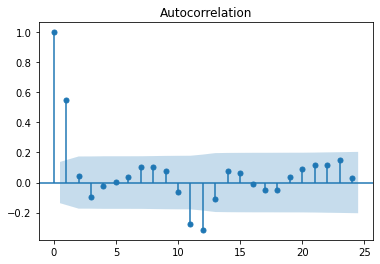

In [41]:
#Plot_acf is used to identify the q parameter
plot_acf(train);

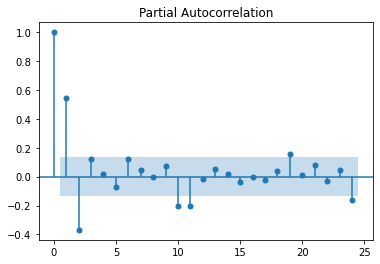

In [42]:
plot_pacf(train,method='ywm');

In [52]:
ar_1 = ARIMA(train, order=(1, 0, 1)).fit()

# We put a typ='levels' to convert our predictions to remove the differencing performed.
train_pred = ar_1.predict()

/Users/johnnahra/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/johnnahra/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/johnnahra/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [53]:
from sklearn.metrics import mean_squared_error
import numpy as np

np.sqrt(mean_squared_error(train, train_pred))

0.00262538438807335

In [54]:
ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          change in pct   No. Observations:                  204
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 922.430
Date:                Wed, 29 Mar 2023   AIC                          -1836.859
Time:                        15:24:48   BIC                          -1823.587
Sample:                    06-01-1996   HQIC                         -1831.490
                         - 05-01-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.015e-05      0.000      0.123      0.902      -0.001       0.001
ar.L1          0.1774      0.078      2.271      0.023       0.024       0.331
ma.L1          0.6828      0.049     14.048      0.000       0.588       0.778
sigma2      6.863e-06   4.12e-07     16.652      0.000    6.06e-06    7.67e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):               109.41
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               4.73   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:
y_pred = ar_1.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ar_1.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]

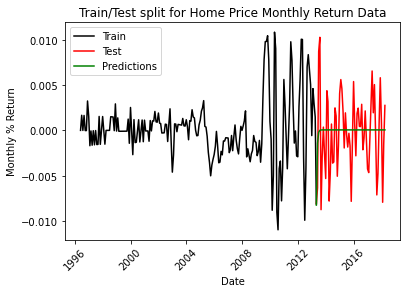

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(train, color = "black",label='Train')
plt.plot(test, color = "red",label='Test')
plt.ylabel('Monthly % Return')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Home Price Monthly Return Data")
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend();